<a href="https://colab.research.google.com/github/Distifiaoktari/klp-9-project-apm-kelas-B/blob/main/MultipleLinearRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Reading the dataset
dataset = pd.read_csv("sample_data/Startups.csv")

In [3]:
dataset.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [22]:
#Setting the value for X and Y
x = dataset[['R&D Spend', 'Administration', 'Marketing Spend']]
y = dataset['Profit']

In [23]:
#Splitting the dataset
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 100)

In [14]:
!pip install LinearRegression

In [24]:
#Fitting the Multiple Linear Regression model
from sklearn.linear_model import LinearRegression
mlr = LinearRegression()  
mlr.fit(x_train, y_train)

LinearRegression()

In [25]:
#Intercept and Coefficient
print("Intercept: ", mlr.intercept_)
print("Coefficients:")
list(zip(x, mlr.coef_))

Intercept:  47085.14615116072
Coefficients:


[('R&D Spend', 0.8284705850322024),
 ('Administration', -0.015794846848255953),
 ('Marketing Spend', 0.024213243353877374)]

In [26]:
#Prediction of test set
y_pred_mlr= mlr.predict(x_test)
#Predicted values
print("Prediction for test set: {}".format(y_pred_mlr))

Prediction for test set: [159377.5498869   73695.32742717  87556.51536214 101782.78003854
  58779.60094152  46331.19124125 163550.77100214  96629.47898904
 115692.34508507  68735.2476778  193333.23804869 135086.2106871
 128434.19661398  45998.9293523   67288.99791039]


In [28]:
#Actual value and the predicted value
mlr_diff = pd.DataFrame({'Actual value': y_test, 'Predicted value': y_pred_mlr})
mlr_diff.head()

,Actual value,Predicted value
6,156122.51,159377.549887
36,90708.19,73695.327427
37,89949.14,87556.515362
28,103282.38,101782.780039
43,69758.98,58779.600942


In [29]:
#Model Evaluation
from sklearn import metrics
meanAbErr = metrics.mean_absolute_error(y_test, y_pred_mlr)
meanSqErr = metrics.mean_squared_error(y_test, y_pred_mlr)
rootMeanSqErr = np.sqrt(metrics.mean_squared_error(y_test, y_pred_mlr))
print('R squared: {:.2f}'.format(mlr.score(x,y)*100))
print('Mean Absolute Error:', meanAbErr)
print('Mean Square Error:', meanSqErr)
print('Root Mean Square Error:', rootMeanSqErr)

R squared: 94.99
Mean Absolute Error: 8421.494888127278
Mean Square Error: 142927396.96972525
Root Mean Square Error: 11955.224672490485


Text(0.5, 1.0, 'Actual vs Predicted')

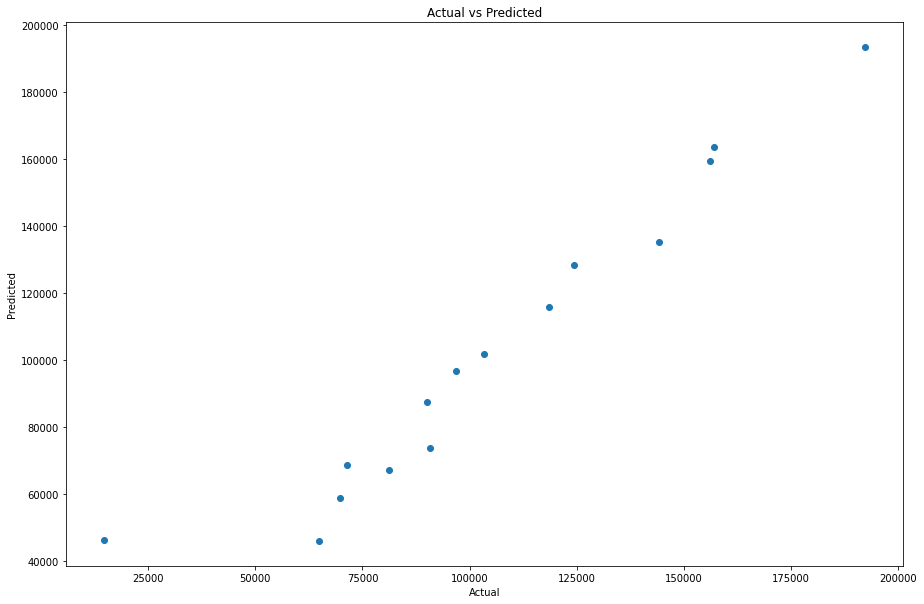

In [33]:
plt.figure(figsize=(15,10))
plt.scatter(y_test,y_pred_mlr)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted')